# House Price Prediction using Machine Learning

This project aims to predict house prices using machine learning techniques.
Three regression models are implemented: Linear Regression, Decision Tree,
and Random Forest. The objective is to compare model performance and identify
the most accurate model.


In [1]:
# importing and data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ignoring warnings for  output
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the data set
data = pd.read_csv("data.csv")

# Displaying the  first 5 rows of data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Dataset Description

The dataset contains information related to residential properties such as
number of bedrooms, bathrooms, square footage, location features, and price.
The target variable is `price`.


In [4]:
# Checking the shape of the dataset
data.shape
# Displaying information about dataset
data.info()
# Summary statistics of numerical features
data.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
Preprocessing


In [5]:
# target variable
target = "price"


In [6]:
# Separate features and target
X = data.drop(columns=[target])
y = data[target]


In [7]:
# Define target variable
target = "price"

# Separate features and target
X = data.drop(columns=[target])
y = data[target]


In [8]:
# Drop columns not useful for prediction
X = X.drop(columns=["date", "street", "statezip", "country"])


In [9]:
# Check missing values
X.isnull().sum()


bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

In [ ]:
EDA

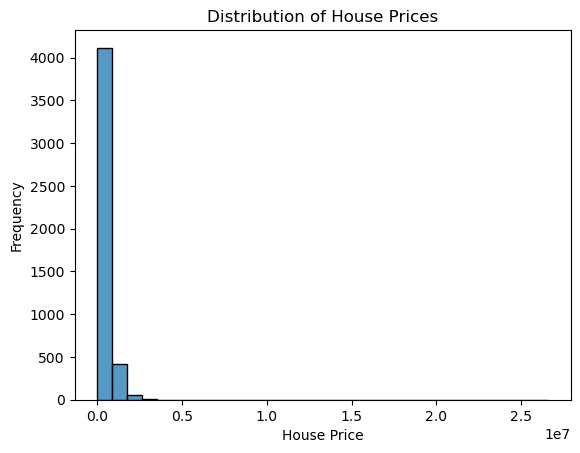

In [10]:
plt.figure()
sns.histplot(y, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()


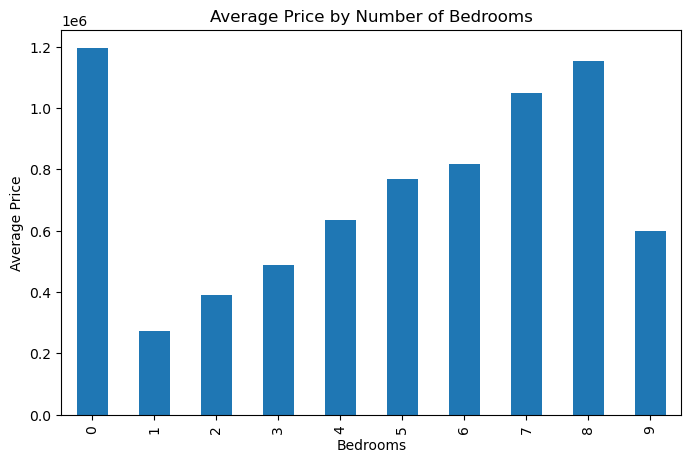

In [11]:
data.groupby("bedrooms")["price"].mean().plot(kind="bar", figsize=(8,5))
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.show()



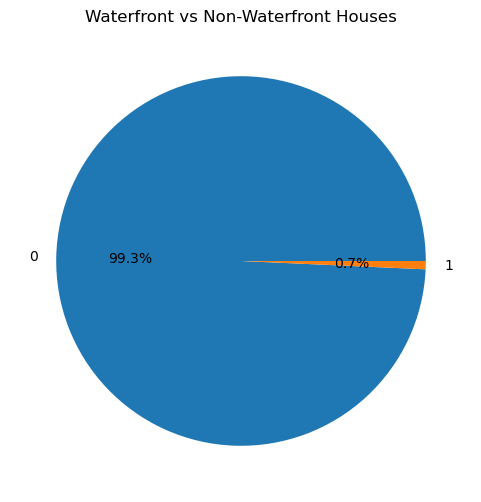

In [12]:
data["waterfront"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Waterfront vs Non-Waterfront Houses"
)
plt.ylabel("")
plt.show()


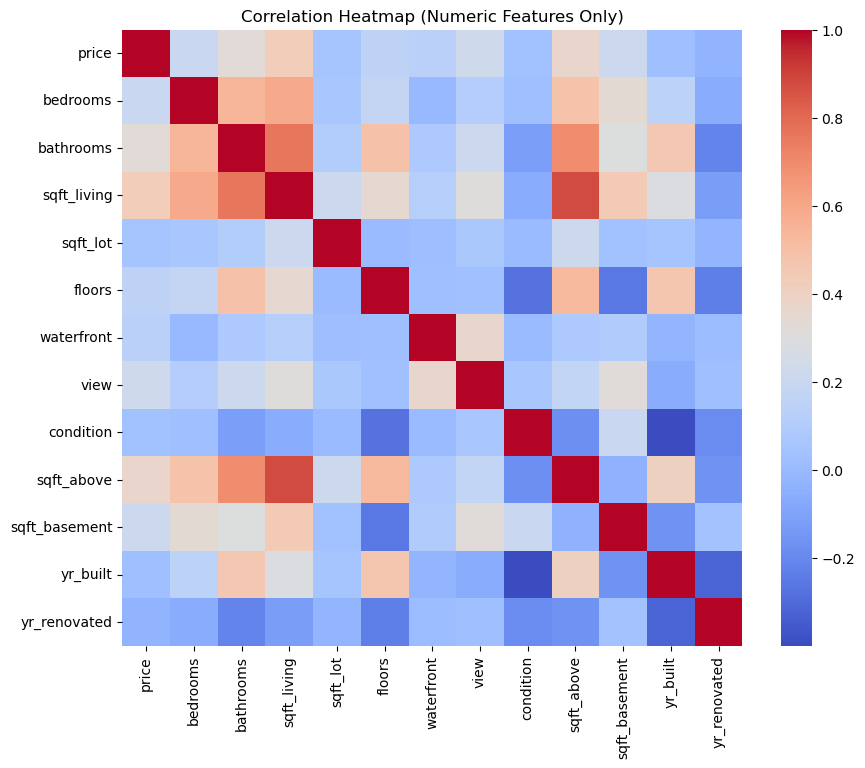

In [13]:
plt.figure(figsize=(10,8))

numeric_df = data.select_dtypes(include=[np.number])  # only numeric columns
sns.heatmap(numeric_df.corr(), cmap="coolwarm")

plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



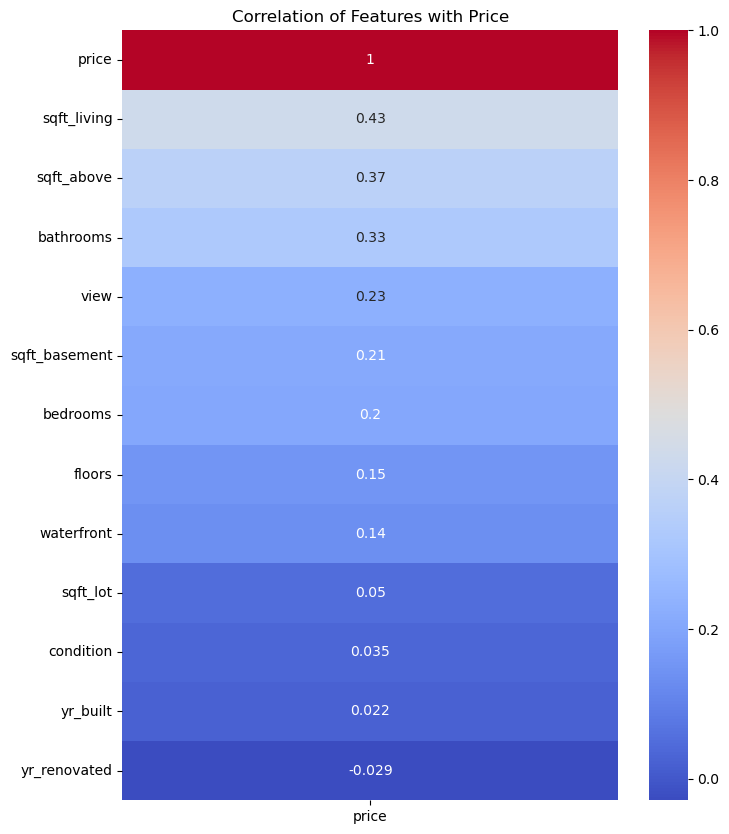

In [14]:
plt.figure(figsize=(8,10))

numeric_df = data.select_dtypes(include=[np.number])
corr_with_target = numeric_df.corr()[["price"]].sort_values(by="price", ascending=False)

sns.heatmap(corr_with_target, annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Price")
plt.show()


modelling

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Ensure we only use numeric features for modeling
X = X.select_dtypes(include=[np.number])

# Double-check: all columns should now be numeric
X.dtypes


bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [17]:
X.select_dtypes(exclude=[np.number]).columns


Index([], dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [19]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


In [20]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


In [21]:
from sklearn.tree import DecisionTreeRegressor

# Tuned Decision Tree Regressor
dt_tuned = DecisionTreeRegressor(
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_tuned.fit(X_train, y_train)

# Predictions
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Evaluation
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
rmse_dt_tuned = np.sqrt(mse_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print("Tuned Decision Tree Performance")
print("RMSE:", rmse_dt_tuned)
print("R2 Score:", r2_dt_tuned)
print("MSE:", mse_dt_tuned)


Tuned Decision Tree Performance
RMSE: 999529.5968809738
R2 Score: 0.020382408828436227
MSE: 999059415041.0419


In [22]:
# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


In [23]:
from sklearn.linear_model import Ridge

# Tuned Linear Regression (Ridge)
lr_tuned = Ridge(
    alpha=10.0  # regularization strength
)

lr_tuned.fit(X_train, y_train)

# Predictions
y_pred_lr_tuned = lr_tuned.predict(X_test)

# Evaluation
mse_lr_tuned = mean_squared_error(y_test, y_pred_lr_tuned)
rmse_lr_tuned = np.sqrt(mse_lr_tuned)
r2_lr_tuned = r2_score(y_test, y_pred_lr_tuned)

print("Tuned Linear Regression Performance")
print("RMSE:", rmse_lr_tuned)
print("R2 Score:", r2_lr_tuned)
print("MSE:", mse_lr_tuned)


Tuned Linear Regression Performance
RMSE: 993376.228342104
R2 Score: 0.03240685165264956
MSE: 986796331035.184


In [24]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return [name, mse, rmse, r2]


In [25]:
results = []

results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "RMSE", "R2 Score"]
)

results_df


,Model,MSE,RMSE,R2 Score
0,Linear Regression,9.869218e+11,9.934394e+05,0.032284
1,Decision Tree,1.052059e+12,1.025699e+06,-0.031585
2,Random Forest,9.927250e+11,9.963559e+05,0.026594


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Target
target = "price"

# Features: drop non-useful columns, keep numeric only
X = data.drop(columns=[target, "date", "street", "statezip", "country", "city"], errors="ignore")
X = X.select_dtypes(include=[np.number])

y = data[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest (a bit tuned but still simple)
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Evaluate
pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("Random Forest Performance:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

# Save model + feature list (IMPORTANT for UI)
joblib.dump(rf_model, "house_price_rf_model.pkl")
joblib.dump(list(X.columns), "model_features.pkl")

print("\nSaved: house_price_rf_model.pkl and model_features.pkl")


Random Forest Performance:
MSE: 991745459115.4019
RMSE: 995864.1770419307
R2: 0.027554034237237457

Saved: house_price_rf_model.pkl and model_features.pkl


In [27]:
import os
os.listdir()


['.ipynb_checkpoints',
 'app.py',
 'data.csv',
 'house_price_pipeline.pkl',
 'House_Price_Prediction_Prototype.ipynb',
 'house_price_rf_model.pkl',
 'model_features.pkl']

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {"alpha": [0.1, 1, 10, 50]}

ridge_cv = GridSearchCV(ridge, params, cv=5, scoring="r2")
ridge_cv.fit(X_train, y_train)


,estimator,Ridge()
,param_grid,"{'alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [30]:
dt_params = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

dt_cv = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_params,
    cv=5,
    scoring="r2"
)
dt_cv.fit(X_train, y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [31]:
# Tuned Random Forest Regressor
rf_tuned = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)

# Predictions
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluation
mse_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance")
print("RMSE:", rmse_tuned)
print("R2 Score:", r2_tuned)
print("MSE:", mse_tuned)


Tuned Random Forest Performance
RMSE: 991700.1188377456
R2 Score: 0.03566930914413968
MSE: 983469125702.7988


In [32]:
results = []

# ---------- BASE MODELS ----------
results.append(evaluate_model("Linear Regression (Base)", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree (Base)", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest (Base)", y_test, y_pred_rf))

# ---------- TUNED MODELS ----------
results.append(evaluate_model("Linear Regression (Tuned)", y_test, y_pred_lr_tuned))
results.append(evaluate_model("Decision Tree (Tuned)", y_test, y_pred_dt_tuned))
results.append(evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf_tuned))

# Create DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "RMSE", "R2 Score"]
)

results_df


,Model,MSE,RMSE,R2 Score
0,Linear Regression (Base),9.869218e+11,9.934394e+05,0.032284
1,Decision Tree (Base),1.052059e+12,1.025699e+06,-0.031585
2,Random Forest (Base),9.927250e+11,9.963559e+05,0.026594
3,Linear Regression (Tuned),9.867963e+11,9.933762e+05,0.032407
4,Decision Tree (Tuned),9.990594e+11,9.995296e+05,0.020382
5,Random Forest (Tuned),9.834691e+11,9.917001e+05,0.035669


### Hyperparameter Tuning Summary

Hyperparameter tuning improved model generalization by controlling complexity
in tree-based models and applying regularization to linear regression.
The tuned Random Forest achieved the best performance among all models.


In [33]:
import joblib

joblib.dump(rf_tuned, "house_price_rf_model.pkl")
joblib.dump(list(X.columns), "model_features.pkl")

print("Tuned model saved and ready for app")


Tuned model saved and ready for app
